## Ejercicio 1.

Carga y Exploraci√≥n de Datos

Objetivo: Familiarizarse con el conjunto de datos y comprender la distribuci√≥n de las categor√≠as.

Acciones:
Cargar el archivo Noticias.xlsx que contiene las noticias.

Explorar la distribuci√≥n de la columna Etiqueta para ver cu√°ntas noticias pertenecen a cada categor√≠a.

Visualizar esta distribuci√≥n mediante gr√°ficos para identificar las categor√≠as m√°s frecuentes.

Contexto: La columna Etiqueta en el conjunto de datos contiene categor√≠as, algunas no especializadas o no tienen un enfoque espec√≠fico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categor√≠as especializadas: deportes, cultura, econom√≠a y justicia. Estas categor√≠as son relevantes porque representan temas con un enfoque claro y espec√≠fico, lo que hace que la clasificaci√≥n sea m√°s √∫til y aplicable en el an√°lisis de noticias.

In [47]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
# Cargar el archivo de datos
file_path = '../Datos/Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              T√≠tulo  \
0  Operador de gr√∫a qued√≥ inconsciente tras agres...   
1   Usaqu√©n, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me hel√≥ la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizar√≠a union...   

                                                info  \
0  El conductor de una moto le lanz√≥ el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata c√≥mo cuatro hombres lo rob...   
3  Las zonas de restaurantes se convierten en par...   
4  El representante de 'la U', Miguel G√≥mez, dijo...   

                                           contenido  Etiqueta  
0  Las autoridades est√°n buscando al conductor de...  colombia  
1  "Los andenes son para los peatones", reclama e...   archivo  
2  A las 7 de la noche me hab√≠a quedado de encont...   archivo  
3  Atravesados. Eso es lo que se les pasa por la ...   archivo  
4  ‚ÄúEstamos proponiendo la figura de un contrato ...   archivo

## Explorar la distribuci√≥n de la columna Etiqueta para ver cu√°ntas noticias pertenecen a cada categor√≠a.

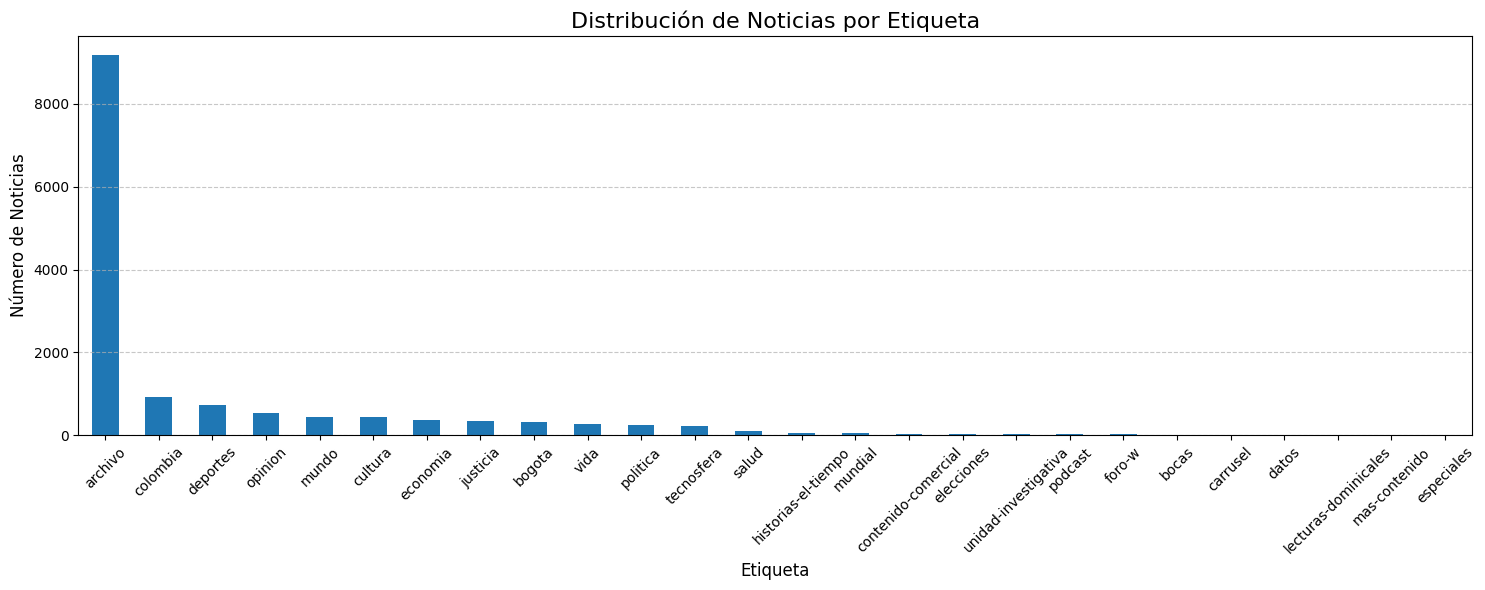

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64

In [49]:
# Calcular la distribuci√≥n de la columna 'Etiqueta'
etiqueta_distribution = data['Etiqueta'].value_counts()

# Graficar la distribuci√≥n como un gr√°fico de barras
plt.figure(figsize=(15, 6))  # Configurar el tama√±o de la figura
etiqueta_distribution.plot(kind='bar')  # Crear el gr√°fico de barras
plt.title('Distribuci√≥n de Noticias por Etiqueta', fontsize=16)  # T√≠tulo del gr√°fico
plt.xlabel('Etiqueta', fontsize=12)  # Etiqueta del eje X
plt.ylabel('N√∫mero de Noticias', fontsize=12)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje X para mejor visualizaci√≥n
plt.grid(axis='y', linestyle='--', alpha=0.7)  # A√±adir una cuadr√≠cula para el eje Y
plt.tight_layout()  # Ajustar autom√°ticamente el dise√±o para evitar solapamientos
plt.show()  # Mostrar el gr√°fico

# Mostrar los conteos de noticias por etiqueta
etiqueta_distribution

Etiqueta dominante: La etiqueta "archivo" tiene una cantidad significativamente mayor de noticias en comparaci√≥n con cualquier otra categor√≠a. Esto indica que la mayor√≠a del contenido en el dataset pertenece a esta etiqueta.

Categor√≠as secundarias: Las etiquetas como "colombia", "deportes", y "opinion" son las m√°s frecuentes despu√©s de "archivo", pero est√°n mucho menos representadas, mostrando una gran disparidad en la distribuci√≥n.

Otras: Hay muchas etiquetas con pocas noticias asociadas (frecuencia baja), lo que sugiere que el contenido est√° concentrado en unas pocas categor√≠as principales.

Categor√≠as relevantes (deportes, cultura, econom√≠a, justicia):

Estas categor√≠as tienen una representaci√≥n significativa, aunque menor en comparaci√≥n con "archivo".
Son temas especializados que permiten realizar an√°lisis m√°s espec√≠ficos, como la identificaci√≥n de patrones dentro de √°reas tem√°ticas (deportes) o el an√°lisis econ√≥mico basado en contenido de noticias.

## Ejercicio 2

Filtrado de Datos

Objetivo: Limitar el conjunto de datos a las categor√≠as relevantes para garantizar que el modelo se entrene y eval√∫e en temas especializados.

Acciones:

Excluir las noticias que pertenecen a la categor√≠a "archivo" y cualquier otra que no est√© en las categor√≠as de deportes, cultura, econom√≠a y justicia.

Asegurarse de que el conjunto de datos resultante tenga una distribuci√≥n equilibrada para estas categor√≠as, en la medida de lo posible.

Contexto: Es importante filtrar los datos para enfocarnos en temas especializados porque algunas categor√≠as pueden tener un discurso amplio y no se tratan de un tema especializado. Esto ayuda a mejorar la precisi√≥n del modelo al enfocarse en categor√≠as bien definidas.

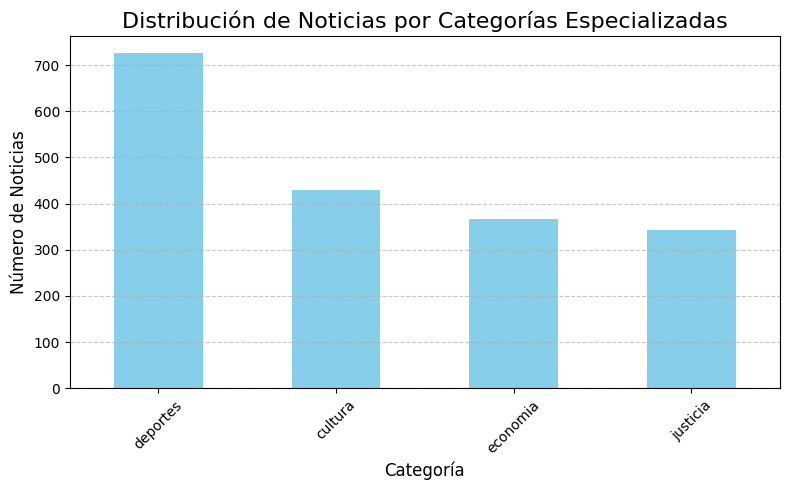

In [50]:
# Filtrar noticias por categor√≠as relevantes excluyendo "archivo" y otras irrelevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
datos_filtrados = data[data['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribuci√≥n de las categor√≠as filtradas
distribucion_filtrada = datos_filtrados['Etiqueta'].value_counts()

# Visualizar la distribuci√≥n de las categor√≠as filtradas
plt.figure(figsize=(8, 5))
distribucion_filtrada.plot(kind='bar', color='skyblue')
plt.title('Distribuci√≥n de Noticias por Categor√≠as Especializadas', fontsize=16)
plt.xlabel('Categor√≠a', fontsize=12)
plt.ylabel('N√∫mero de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### Asegurarse de que el conjunto de datos resultante tenga una distribuci√≥n equilibrada para estas categor√≠as, en la medida de lo posible.

Submuestreo: Si las categor√≠as tienen diferentes cantidades de datos, se toma la misma cantidad que la categor√≠a con menos datos, eliminando registros sobrantes de las categor√≠as m√°s grandes.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16360\264665382.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


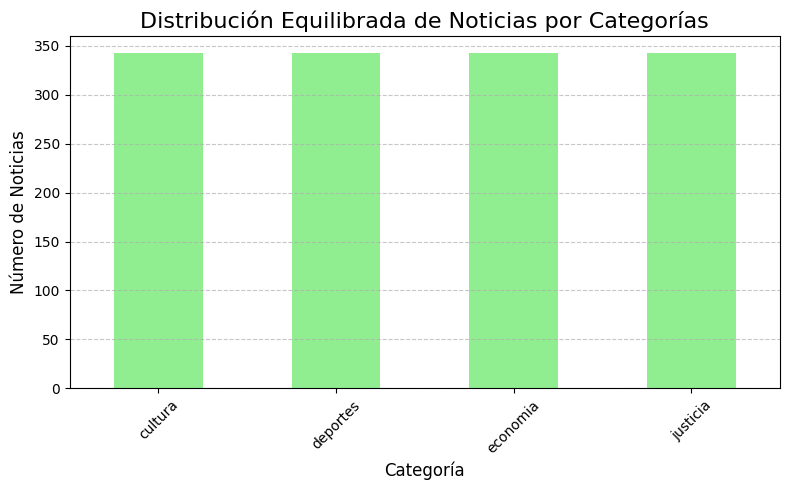

Etiqueta
cultura     343
deportes    343
economia    343
justicia    343
Name: count, dtype: int64


In [51]:
# Identificar el tama√±o m√≠nimo entre las categor√≠as
min_count = datos_filtrados['Etiqueta'].value_counts().min()

# Submuestrear cada categor√≠a para que todas tengan la misma cantidad de datos
datos_balanceados = (
    datos_filtrados.groupby('Etiqueta', group_keys=False)
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)

# Verificar la nueva distribuci√≥n equilibrada
distribucion_balanceada = datos_balanceados['Etiqueta'].value_counts()

# Visualizar la distribuci√≥n equilibrada
plt.figure(figsize=(8, 5))
distribucion_balanceada.plot(kind='bar', color='lightgreen')
plt.title('Distribuci√≥n Equilibrada de Noticias por Categor√≠as', fontsize=16)
plt.xlabel('Categor√≠a', fontsize=12)
plt.ylabel('N√∫mero de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la nueva distribuci√≥n en la consola
print(distribucion_balanceada)


### Sobremuestreo: Si las categor√≠as tienen diferentes cantidades de datos, se duplican registros en las categor√≠as con menos datos para igualar la cantidad de la categor√≠a m√°s grande.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16360\494191034.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(max_count, replace=True, random_state=42))


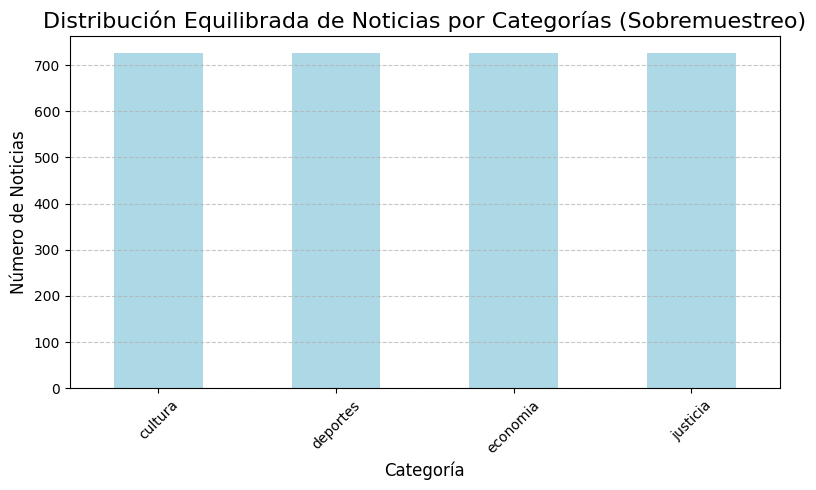

Etiqueta
cultura     727
deportes    727
economia    727
justicia    727
Name: count, dtype: int64


In [18]:
# Identificar el tama√±o m√°ximo entre las categor√≠as
max_count = datos_filtrados['Etiqueta'].value_counts().max()

# Sobremuestrear cada categor√≠a para igualar la cantidad al m√°ximo
datos_balanceados = (
    datos_filtrados.groupby('Etiqueta', group_keys=False)
    .apply(lambda x: x.sample(max_count, replace=True, random_state=42))
    .reset_index(drop=True)
)

# Verificar la nueva distribuci√≥n equilibrada
distribucion_balanceada = datos_balanceados['Etiqueta'].value_counts()

# Visualizar la distribuci√≥n equilibrada
plt.figure(figsize=(8, 5))
distribucion_balanceada.plot(kind='bar', color='lightblue')
plt.title('Distribuci√≥n Equilibrada de Noticias por Categor√≠as (Sobremuestreo)', fontsize=16)
plt.xlabel('Categor√≠a', fontsize=12)
plt.ylabel('N√∫mero de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la nueva distribuci√≥n en la consola
print(distribucion_balanceada)


## Ejercicio 3

Preprocesamiento de Texto

Objetivo: Preparar los datos textuales para el entrenamiento del modelo.

Acciones:

Convertir todo el texto a min√∫sculas para uniformidad.

Eliminar puntuaci√≥n y n√∫meros para reducir el ruido en los datos.

Eliminar palabras comunes (stop words) que no aportan significado espec√≠fico al an√°lisis.

Tokenizar el texto, es decir, dividir el texto en palabras individuales.

Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

### Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a min√∫sculas, eliminaremos la puntuaci√≥n, los n√∫meros y los espacios en blanco adicionales.

In [52]:
# Funci√≥n para preprocesar texto
def preprocess_text(text):
    """
    Esta funci√≥n realiza el preprocesamiento del texto.
    1. Convierte el texto a min√∫sculas.
    2. Elimina la puntuaci√≥n.
    3. Elimina los n√∫meros.
    4. Elimina los espacios en blanco adicionales.

    Par√°metros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a min√∫sculas
    text = text.lower()
    # Eliminar puntuaci√≥n
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar n√∫meros
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')

contenido  \
0  Las autoridades est√°n buscando al conductor de...   
1  "Los andenes son para los peatones", reclama e...   
2  A las 7 de la noche me hab√≠a quedado de encont...   
3  Atravesados. Eso es lo que se les pasa por la ...   
4  ‚ÄúEstamos proponiendo la figura de un contrato ...   

                              contenido_preprocesado  
0  las autoridades est√°n buscando al conductor de...  
1  los andenes son para los peatones reclama enf√°...  
2  a las  de la noche me hab√≠a quedado de encontr...  
3  atravesados eso es lo que se les pasa por la c...  
4  ‚Äúestamos proponiendo la figura de un contrato ...

Dimensiones de los datos: (13738, 7)


In [54]:
# Se visualizan todas las columnas del data set
data.head()

Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              T√≠tulo  \
0  Operador de gr√∫a qued√≥ inconsciente tras agres...   
1   Usaqu√©n, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me hel√≥ la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizar√≠a union...   

                                                info  \
0  El conductor de una moto le lanz√≥ el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata c√≥mo cuatro hombres lo rob...   
3  Las zonas de restaurantes se convierten en par...   
4  El representante de 'la U', Miguel G√≥mez, dijo...   

                                           contenido  Etiqueta  \
0  Las autoridades est√°n buscando al conductor de...  colombia   
1  "Los andenes son para los peatones", reclama e...   archivo   
2  A las 7 de la noche me hab√≠a quedado de encont...   archivo   
3  Atravesados. Eso es lo que se les pasa por la ...   archivo   
4  ‚ÄúEstamos proponiendo la figura de un contrato ...   archivo   

                              contenido_preprocesado  
0  las autoridades est√°n buscando al conductor de...  
1  los andenes son para los peatones reclama enf√°...  
2  a las  de la noche me hab√≠a quedado de encontr...  
3  atravesados eso es lo que se les pasa por la c...  
4  ‚Äúestamos proponiendo la figura de un contrato ...

### Tokenizar el texto, es decir, dividir el texto en palabras individuales.

In [55]:
# Tokenizaci√≥n
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

contenido_preprocesado  \
0  las autoridades est√°n buscando al conductor de...   
1  los andenes son para los peatones reclama enf√°...   
2  a las  de la noche me hab√≠a quedado de encontr...   
3  atravesados eso es lo que se les pasa por la c...   
4  ‚Äúestamos proponiendo la figura de un contrato ...   

                                              tokens  
0  [las, autoridades, est√°n, buscando, al, conduc...  
1  [los, andenes, son, para, los, peatones, recla...  
2  [a, las, de, la, noche, me, hab√≠a, quedado, de...  
3  [atravesados, eso, es, lo, que, se, les, pasa,...  
4  [‚Äú, estamos, proponiendo, la, figura, de, un, ...

In [56]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

Contenido preprocesado:  las autoridades est√°n buscando al conductor de una moto que le lanz√≥ el casco a carlos alberto carmona operador de gr√∫a de la empresa segrup  quien perdi√≥ por una hora el conocimiento tras la agresi√≥n en un video qued√≥ registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gait√°n cort√©s en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la ca√≠da se golpea la cabeza con la gr√∫a que conduce  el agredido perdi√≥ el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atr√°s en donde est√° el operador en el suelo luego su compa√±ero agarra la moto y huye del lugar y a pocos metros recoge al agresor las auto

### Eliminar palabras comunes (stop words) que no aportan significado espec√≠fico al an√°lisis.

In [57]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

tokens  \
0  [las, autoridades, est√°n, buscando, al, conduc...   
1  [los, andenes, son, para, los, peatones, recla...   
2  [a, las, de, la, noche, me, hab√≠a, quedado, de...   
3  [atravesados, eso, es, lo, que, se, les, pasa,...   
4  [‚Äú, estamos, proponiendo, la, figura, de, un, ...   

                                tokens_sin_stopwords  
0  [autoridades, buscando, conductor, moto, lanz√≥...  
1  [andenes, peatones, reclama, enf√°tica, carmenz...  
2  [noche, quedado, encontrar, boris, siempre, si...  
3  [atravesados, pasa, cabeza, residentes, transe...  
4  [‚Äú, proponiendo, figura, contrato, civil, uni√≥...

### Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

#### con esta aplicacion de padding agrega dos columnas al data set 'sequences' y 'padded_sequences'. mirar si se deja esta o la que sigue

In [ ]:
# con esta aplicacion de padding agrega dos columnas al data set 'sequences' y 'padded_sequences'. mirar si se deja esta o la que sigue
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paso 1: Crear el tokenizador y ajustarlo a las palabras de tokens_sin_stopwords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokens_sin_stopwords'])

# Extraer el vocabulario generado (word_index)
word_index = tokenizer.word_index
#display(f"Vocabulario generado (word_index): {word_index}")

# Paso 2: Convertir las palabras a √≠ndices num√©ricos
data['sequences'] = tokenizer.texts_to_sequences(data['tokens_sin_stopwords'])

# Paso 3: Aplicar padding
max_len = 50  # Longitud m√°xima para el padding (aj√∫stala seg√∫n el caso)
data['padded_sequences'] = list(pad_sequences(data['sequences'], maxlen=max_len, padding='post'))

# Mostrar los resultados
print(data[['tokens_sin_stopwords', 'sequences', 'padded_sequences']].head())


                                tokens_sin_stopwords  \
0  [autoridades, buscando, conductor, moto, lanz√≥...   
1  [andenes, peatones, reclama, enf√°tica, carmenz...   
2  [noche, quedado, encontrar, boris, siempre, si...   
3  [atravesados, pasa, cabeza, residentes, transe...   
4  [‚Äú, proponiendo, figura, contrato, civil, uni√≥...   

                                           sequences  \
0  [180, 1761, 1690, 2802, 2163, 4326, 170, 887, ...   
1  [5962, 4658, 7393, 18465, 20074, 5393, 2804, 4...   
2  [306, 3253, 902, 9107, 173, 92, 12826, 90, 293...   
3  [40091, 68, 611, 2946, 11277, 4268, 7974, 516,...   
4  [9, 14630, 930, 772, 1003, 762, 1454, 9723, 72...   

                                    padded_sequences  
0  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
1  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
2  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
3  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
4  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1,

#### con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
ojo: revise y el profe la deja asi para usar la varaible para la divion de datos.

In [ ]:
# con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paso 1: Crear el tokenizador y ajustarlo a las palabras de tokens_sin_stopwords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokens_sin_stopwords'])

# Extraer el vocabulario generado (word_index)
word_index = tokenizer.word_index
#print(f"Vocabulario generado (word_index): {word_index}")

# Paso 2: Convertir las palabras a √≠ndices num√©ricos
sequences = tokenizer.texts_to_sequences(data['tokens_sin_stopwords'])

# Paso 3: Aplicar padding y guardar en la variable padded_sequences
max_len = 50  # Longitud m√°xima para el padding 
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar los resultados
print(padded_sequences[:5])  # Muestra las primeras 5 secuencias con padding


Vocabulario generado (word_index): {'pm': 1, 'colombia': 2, 'valle': 3, 'manizales': 4, 'coronavirus': 5, 'mil': 6, 'mercados': 7, 'barranquilla': 8, '‚Äú': 9, '‚Äù': 10, 'cerca': 11, 'cauca': 12, 'cuarentena': 13, 'salud': 14, 'solidario': 15, 'recogido': 16, 'donat√≥n': 17, 'casos': 18, 'vida': 19, 'posible': 20, 'manual': 21, 'cabina': 22, 'desinfecci√≥n': 23, 'pueblo': 24, 'a√±os': 25, 'acceder': 26, 'medicamentos': 27, 'm√©dica': 28, 'f√≥rmula': 29, 'mental': 30, 'gu√≠a': 31, 'venden': 32, 'especializadas': 33, 'cannabis': 34, 'farmacias': 35, 'bipolaridad': 36, 'medicamen': 37, 'si': 38, 'ciudad': 39, 'prueba': 40, 'colegio': 41, 'personas': 42, 'miedo': 43, 'par': 44, 'dos': 45, 'clases': 46, 'pa√≠s': 47, 'mente': 48, 'ponga': 49, 'l√≥gica': 50, 'matem√°ticas': 51, 'test': 52, 'matem√°tica': 53, 'ejercite': 54, 'ciento': 55, 'garc√≠a': 56, 'a√±o': 57, 'ser': 58, 'medell√≠n': 59, 'millones': 60, '‚Äô': 61, 'dijo': 62, '‚Äò': 63, 'seg√∫n': 64, 'parte': 65, 'tiempo': 66, 'diario': 

In [61]:
data

Columna1                                            Enlaces  \
0             0  https://www.eltiempo.com/agresion-contra-un-op...   
1             1  https://www.eltiempo.com/archivo/documento/CMS...   
2             2  https://www.eltiempo.com/archivo/documento/CMS...   
3             3  https://www.eltiempo.com/archivo/documento/CMS...   
4             4  https://www.eltiempo.com/archivo/documento/CMS...   
...         ...                                                ...   
14391     14391  https://www.eltiempo.com/vida/viajar/una-viaje...   
14392     14392  https://www.eltiempo.com/vida/viajar/un-dia-pe...   
14393     14393  https://www.eltiempo.com/vida/viajar/visitar-b...   
14394     14394  https://www.eltiempo.com/vida/viajar/we-trade-...   
14395     14395  https://www.eltiempo.com/vida/viajar/yovoy-cam...   

                                                  T√≠tulo  \
0      Operador de gr√∫a qued√≥ inconsciente tras agres...   
1       Usaqu√©n, primera en infracciones por mal parqueo   
2      'Me atracaron y vi un arma que me hel√≥ la sang...   
3      Escoltas mal estacionados, dolor de cabeza de ...   
4      Radicado primer proyecto que autorizar√≠a union...   
...                                                  ...   
14391  Una viajera pens√≥ que la aerol√≠nea Viva Air le...   
14392  Un d√≠a perfecto en Coco Cay, la isla privada d...   
14393  Bar√∫: el para√≠so colombiano abierto para todos...   
14394           Con WeTrade, llega la hora LGBT a Bogot√°   
14395       #YoVoy, una invitaci√≥n a viajar por Colombia   

                                                    info  \
0      El conductor de una moto le lanz√≥ el casco y p...   
1      La localidad ocupa el primer lugar en comparen...   
2      Un ciudadano relata c√≥mo cuatro hombres lo rob...   
3      Las zonas de restaurantes se convierten en par...   
4      El representante de 'la U', Miguel G√≥mez, dijo...   
...                                                  ...   
14391  La mujer hizo la denuncia en redes. La aerol√≠n...   
14392  El proyecto Global Private Island Collection c...   
14393  Cuatro hoteles y el Aviario Nacional lanzar√°n ...   
14394  El 1 y 2 de noviembre se celebrar√° esta Feria ...   
14395  El presidente Duque lanz√≥ la campa√±a nacional ...   

                                               contenido  Etiqueta  \
0      Las autoridades est√°n buscando al conductor de...  colombia   
1      "Los andenes son para los peatones", reclama e...   archivo   
2      A las 7 de la noche me hab√≠a quedado de encont...   archivo   
3      Atravesados. Eso es lo que se les pasa por la ...   archivo   
4      ‚ÄúEstamos proponiendo la figura de un contrato ...   archivo   
...                                                  ...       ...   
14391  En Twitter es tendencia 'FCAS' por una denunci...      vida   
14392  La naviera internacional Royal Caribbean prese...      vida   
14393  ¬øNecesita razones para ir a Bar√∫? A menos de u...      vida   
14394  Se estima que la poblaci√≥n LGTBI en Colombia e...      vida   
14395  Con la intenci√≥n de que los colombianos conozc...      vida   

                                  contenido_preprocesado  \
0      las autoridades est√°n buscando al conductor de...   
1      los andenes son para los peatones reclama enf√°...   
2      a las  de la noche me hab√≠a quedado de encontr...   
3      atravesados eso es lo que se les pasa por la c...   
4      ‚Äúestamos proponiendo la figura de un contrato ...   
...                                                  ...   
14391  en twitter es tendencia fcas por una denuncia ...   
14392  la naviera internacional royal caribbean prese...   
14393  ¬ønecesita razones para ir a bar√∫ a menos de un...   
14394  se estima que la poblaci√≥n lgtbi en colombia e...   
14395  con la intenci√≥n de que los colombianos conozc...   

                                                  tokens  \
0      [las, autoridades, est√°n, buscando, al, conduc...   
1  

In [34]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:


import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Lista de palabras comunes en espa√±ol (stop words)
stop_words = set(stopwords.words('spanish'))

# Funci√≥n para limpiar y preprocesar el texto
def preprocess_text(text):
    # Convertir a min√∫sculas
    text = text.lower()
    # Eliminar puntuaci√≥n y n√∫meros
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar palabras comunes (stop words)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar la funci√≥n a la columna de texto relevante (por ejemplo, 'contenido')
datos_filtrados['contenido_procesado'] = datos_filtrados['contenido'].apply(preprocess_text)

# Tokenizaci√≥n y Padding para usar en redes neuronales
tokenizer = Tokenizer()
# Ajustar el tokenizador al texto procesado
tokenizer.fit_on_texts(datos_filtrados['contenido_procesado'].apply(lambda x: ' '.join(x)))

# Convertir texto en secuencias num√©ricas
sequences = tokenizer.texts_to_sequences(datos_filtrados['contenido_procesado'].apply(lambda x: ' '.join(x)))

# Aplicar padding para que todas las secuencias tengan la misma longitud
padded_sequences = pad_sequences(sequences, padding='post')

# Verificaci√≥n de las secuencias procesadas
print("Primer texto tokenizado y con padding:", padded_sequences[0])
print("Tama√±o del vocabulario:", len(tokenizer.word_index))

# Mostrar el DataFrame procesado
#import ace_tools as tools; tools.display_dataframe_to_user(name="Datos Procesados para NLP", dataframe=datos_filtrados)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'c:\\Users\\Lenovo\\anaconda3\\envs\\nlp_proyecto_final\\nltk_data'
    - 'c:\\Users\\Lenovo\\anaconda3\\envs\\nlp_proyecto_final\\share\\nltk_data'
    - 'c:\\Users\\Lenovo\\anaconda3\\envs\\nlp_proyecto_final\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a min√∫sculas, eliminaremos la puntuaci√≥n, los n√∫meros y los espacios en blanco adicionales.

In [ ]:
# Funci√≥n para preprocesar texto
def preprocess_text(text):
    """
    Esta funci√≥n realiza el preprocesamiento del texto.
    1. Convierte el texto a min√∫sculas.
    2. Elimina la puntuaci√≥n.
    3. Elimina los n√∫meros.
    4. Elimina los espacios en blanco adicionales.

    Par√°metros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a min√∫sculas
    text = text.lower()
    # Eliminar puntuaci√≥n
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar n√∫meros
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')



## Paso 2: Tokenizaci√≥n

En este paso, convertiremos el texto preprocesado en una lista de palabras individuales utilizando la tokenizaci√≥n.

In [ ]:
# Tokenizaci√≥n
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

In [ ]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

## Paso 3: Eliminaci√≥n de Stop Words

En este paso, eliminaremos las stop words de los tokens generados.

In [ ]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

## Paso 4: C√°lculo de TF-IDF

En este paso, calcularemos la representaci√≥n TF-IDF de los textos preprocesados. TF-IDF (Term Frequency-Inverse Document Frequency) es una t√©cnica que pondera la importancia de una palabra en un documento en relaci√≥n con un corpus.

In [ ]:
# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

### ¬øQu√© ganamos con TF-IDF?

- **Frecuencia de t√©rmino (TF)**: Mide la frecuencia de una palabra en un documento. Si una palabra aparece muchas veces en un documento, es probable que sea importante para ese documento.
- **Frecuencia inversa de documento (IDF)**: Mide la rareza de una palabra en un corpus. Si una palabra es com√∫n en muchos documentos, es menos informativa que una palabra rara.

La f√≥rmula de TF-IDF es:

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

Donde:

- $\text{TF}(t, d)$ es la frecuencia de la palabra $t$ en el documento $d$.
- $\text{IDF}(t)$ es la frecuencia inversa de documento de la palabra $t$ en el corpus.

pero, que fue lo que hicimos, en resumen, con TF-IDF, convertimos el texto en vectores num√©ricos que representan la importancia de las palabras en el texto.

In [ ]:
# Informaci√≥n adicional
lista_contenido= data['contenido_preprocesado'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad

lista_contenido= [f"{word} " if (i+1)%15!=0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

## Ahora convertimos la lista en un string

contenido= ''.join(lista_contenido)

text_info= f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.


Acabamos de convertir un documento de texto en un vector num√©rico que puede ser
utilizado en algoritmos de aprendizaje autom√°tico. Ese vector representa la importancia 
de cada palabra en el documento original y nos permite usar por ejemplo:

- ACP para reducir la dimensionalidad del vector.
- Clustering para agrupar documentos similares.
- Clasificaci√≥n para predecir la categor√≠a de un documento.
- Recuperaci√≥n de informaci√≥n para encontrar documentos similares.

"""

print(text_info)



## Paso 5: Generaci√≥n de Embeddings de Palabras con Word2Vec

En este paso, utilizaremos el modelo Word2Vec para generar embeddings de palabras. Los embeddings de palabras son representaciones vectoriales densas que capturan el significado sem√°ntico de las palabras.

In [ ]:
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens_sin_stopwords'], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no est√° en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save("../../Datos/Embeddings/word2vec.model")

## Guardar Resultados

Finalmente, guardaremos los resultados preprocesados en un archivo CSV para su posterior uso.

In [ ]:
# Guardar los resultados preprocesados
data.to_csv('../../Datos/Datos Preprocesados/Noticias_preprocesadas.csv', index=False)

## Ejercicio

### Ajuste Ejercicio

Hemos creado dos modelos de vectorizaci√≥n de palabras, uno basado en TF-IDF y otro basado en Word2Vec. Su primera tarea es:

1. Eliminar las palabras vac√≠as del texto.
2. Calcular la representaci√≥n TF-IDF de los textos preprocesados.
3. Generar embeddings de palabras utilizando Word2Vec.

Para la representaci√≥n TF-IDF, utilice unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9. Para Word2Vec, utilice un tama√±o de ventana de 5 y un tama√±o de vector de 100.

Finalmente, guarde los resultados en un archivo CSV.

### Crear un Modelo Simple de ACP y Clustering

Despu√©s de generar los vectores de palabras, su segunda tarea es crear un modelo simple de ACP (An√°lisis de Componentes Principales) y aplicar clustering a los vectores generados. Utilice el algoritmo KMeans con 5 clusters.

PASOS:

1. Ajuste un modelo de ACP a los vectores generados.
2. Ajuste un modelo de KMeans con 5 clusters a los componentes principales.
3. Analice los resultados del clustering y determine si los clusters son significativos.

### Preguntas

1. ¬øQu√© puede inferir de los clusters generados?
2. ¬øQu√© palabras son las m√°s representativas de cada cluster?
3. ¬øQu√© palabras tienen los embeddings m√°s similares?
